## Visualizing the results of an ANN on a 2D plane

Here we show that, by visualizing the results of a 3-layer NN with (2,5,1) neurons, we get a more complicated result than the one obtained with a (2,1) NN. 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def apply_layer(y, w, b): 
    """
    This function is used to compute the math of a NN layer 
    """
    z = np.dot(w,y) + b;
    return 1/(1+np.exp(-z))

In [3]:
# For this Python notebook, we consider the case of a 3-layer NN with (2,5,1) neurons. The activation function is the sigmoid.
N_layers = 3; 
N_0, N_1, N_2 = 2, 5, 1


# For a 3-layer NN, we have 2 connecting matrices and 2 biases vectors
w_01 = np.random.uniform(low = -10, high = +10, size = (N_1,N_0)) # N0xN1 matrix
w_12 = np.random.uniform(low = -10, high = +10, size = (N_2,N_1)) # N1xN2 matrix
b_1 = np.random.uniform(low = -1, high = +1, size = N_1)
b_2 = np.random.uniform(low = -1, high = +1, size = N_2)

In [4]:
# Initial values of the neurons in the first layer
in_ = [0.2, 0.8];
y_0 = np.array(in_)

# Hand-by-hand application of the NN layers
y_1 = apply_layer(y_0, w_01, b_1);
print('The output of the first layer is:', y_1)
y_2 = apply_layer(y_1, w_12, b_2);
print('The output of the NN is:', y_2)

The output of the first layer is: [0.00530873 0.99799472 0.72759842 0.0027068  0.99780542]
The output of the NN is: [0.99999954]


In [5]:
# NOTE: this is NOT the most efficient way to do this (but simple)

M = 50; 
y_out = np.zeros((M,M)); 

for jj in range(M):
    for kk in range(M):
        value_0 = float(jj)/M - 0.5;
        value_1 = float(kk)/M - 0.5; 
        y_out[jj,kk] = apply_layer(apply_layer([value_0, value_1], w_01, b_1) ,w_12, b_2)[0]

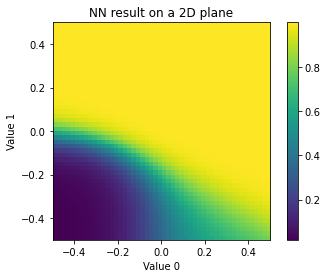

In [6]:
# Display image 
plt.imshow(y_out, origin = 'lower', extent = (-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.xlabel('Value 0')
plt.ylabel('Value 1')
plt.title('NN result on a 2D plane')
plt.show()